## import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import random
random.seed(1897)

In [2]:
# check the system font
import matplotlib.font_manager as font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# add the font wanted
font_dir = ['../Latin-Modern-Roman']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'Latin Modern Roman'
print(plt.rcParams['font.family'])

['Latin Modern Roman']


## Helper Functions

In [3]:
def random_num(low, upper):
    # return a random number within the range
    random_num = low + (upper - low)*np.random.random()
    return random_num
    

In [4]:
def random_int(low, upper):
    #return a random int within the range
    random_int = np.random.randint(low,upper,1)
    return random_int[0]

In [6]:
def time_points(record_len):
    # return onset time and end_time
    # ideally: at least 6 hours before onset， 
    # here set as 12 to obtian more recordings for before onset
    onset_time = random_int(12, record_len)
    # last_time = random_int(1,max_last_time)
    # end_time = onset_time + last_time
    # if end_time >record_len: 
    #     end_time = record_len
    end_time = record_len
    return onset_time, end_time

In [7]:
def g_boolean_feature(series, record_len, onset_time, end_time):
    # return a feature column(a pd series) that contains True within the onset and end time
    for time in range(onset_time,end_time):
        series.iloc[time] = True
    for time in range(0,onset_time):
        series.iloc[time] = False
    # as the end time should be the same as record_len
    # for time in range(end_time,record_len): 
    #     series.iloc[time] = False
    
    return series

In [9]:
def g_number_feature(series, record_len, onset_time, end_time,positive_range,normal_range):
    for time in range(onset_time,end_time):
        series.iloc[time] = random_num(positive_range[0],positive_range[1])
    for time in range(0,onset_time):
        series.iloc[time] = random_num(normal_range[0],normal_range[1])
    # for time in range(end_time,record_len): 
    #     series.iloc[time] = random_num(normal_range[0],normal_range[1])
    
    return series

In [10]:
def truncate(df):
  for index, row in df.iterrows():
    if row['sepsis'] == True:
      truncate_at = index
      break
  return df[:(truncate_at+7)]

## Feature generation Functions

### generate sepsis label

In [11]:
def g_sepsis(df,is_sepsis, onset_time):
    # generate the sepsis_label, randomly generate an onset time and this label 
    # should till the end 
    sepsis_label = pd.Series(range(record_len))
    if not is_sepsis:
        sepsis_label = is_sepsis
    else:
      sepsis_onset, sepsis_end = time_points(record_len)
      if onset_time != np.nan:
        sepsis_onset = onset_time
      sepsis_label = g_boolean_feature(sepsis_label,record_len,sepsis_onset,sepsis_end)
      # define sepsis 6 hours ahead the occurrence
      for time in range(len(sepsis_label)):
        if sepsis_label.iloc[time] == True:
          if time-6 <=0: start_time = 0 # actualy not necessary!
          else: start_time = time-6
          sepsis_label.iloc[start_time:time] = True
    
    df.sepsis = sepsis_label
    
    return df

### generate static features

In [12]:
def g_gender(df, is_sepsis):
    # Gender male or female ->  1 for male and 0 for female
    if is_sepsis:
        gender = np.random.choice([1,0], 1, p = [0.5676, 0.4324])
    else:
        gender = np.random.choice([1,0], 1, p = [0.5581, 0.4419])
    
    gender = gender[0]
    gender = [gender for i in range(record_len)]
    df.gender = gender
    return df

In [13]:
def g_materal_age(df, is_sepsis):
    # Maternal age (years)
    if is_sepsis:
        age = random_int(15,49)
    else:
        age = random_int(14,47)
        
    age = [int(age) for i in range(record_len)]
    df.materal_age = age
    return df

In [14]:
def g_gestational_age(df, is_sepsis):
    # Gestational age (weeks)
    if is_sepsis:
        G_age = random_int(25,40.4)
    else:
        G_age = random_int(27,40.4)
        
    G_age = [int(G_age) for i in range(record_len)]
    df.gestational_age = G_age
    return df

In [15]:
def g_weight(df, is_sepsis):
    # Weight (grams)
    if is_sepsis:
        weight = random_int(520,3605)
    else:
        weight = random_int(755,4935)
        
    weight = [int(weight) for i in range(record_len)]
    df.weight = weight
    return df

In [16]:
def g_cervi(df, is_sepsis):
    if is_sepsis:
        cervi = np.random.choice([True,False], 1, p = [0.6505, 0.3495])
    else:
        cervi = np.random.choice([True,False], 1, p = [0.485, 0.515])
        
    cervi = [bool(cervi) for i in range(record_len)]
    df.cervicovaginitis = cervi
    return df

In [17]:
def g_ut_infection(df, is_sepsis):
    # Urinary tract infections
    if is_sepsis:
        ut_infection = np.random.choice([True,False], 1, p = [0.6602, 0.3398])
    else:
        ut_infection = np.random.choice([True,False], 1, p = [0.591, 0.409])
        
    ut_infection = [bool(ut_infection) for i in range(record_len)]
    df.ut_infection = ut_infection
    return df

In [18]:
def g_PRM(df, is_sepsis):
    # Premature rupture of membranes
    if is_sepsis:
        PRM = np.random.choice([True,False], 1, p = [0.3107, 0.6893])
    else:
        PRM = np.random.choice([True,False], 1, p = [0.326, 0.674])
        
    PRM = [bool(PRM) for i in range(record_len)]
    df.PRM = PRM
    return df

In [19]:
def g_chori(df, is_sepsis):
    # Chorioamniionitis
    if is_sepsis:
        chori = np.random.choice([True,False], 1, p = [0.1165, 0.8835])
    else:
        chori = np.random.choice([True,False], 1, p = [0.083, 0.917])
        
    chori = [bool(chori) for i in range(record_len)]
    df.chori = chori
    return df

### generate dynamic features

In [20]:
def missing_distrubution(df_series,missing_rate):
  # generate a feature column with the missing rate as input
  df_s = df_series
  missing_number = int(len(df_s)*missing_rate)
  missing_position = random.sample(range(len(df_s)),missing_number)
  df_s.iloc[missing_position] = np.nan
  return df_s

In [21]:
# ---> in F
# normal_temp_range = (96.62, 98.78)
# fever_range = (100.4,104)
# hypothermia_range = (89.6,97.7)
# ---> in Celsus
normal_temp_range = (35.9, 37.1)
fever_range = (38,40)
hypothermia_range = (32,36.5)

def g_temp(df,is_sepsis, missing_rate):
    #=36.5+-0.6 -> normal temperature
    #>38 -> fever
    has_fever = False;
    has_hypothermia = False;
    fever = pd.Series(range(record_len))
    hypothermia = pd.Series(range(record_len))
    temp = pd.Series(range(record_len))
    if is_sepsis:
        has_fever=np.random.choice([True,False],1,p = [0.301, 0.699])
        has_hypothermia=np.random.choice([True,False],1,p = [0.1456, 0.8544])
    else:
        has_fever=np.random.choice([True,False],1,p = [0.129, 0.871])
        has_hypothermia=np.random.choice([True,False],1,p = [0.015, 0.985])
    has_fever = has_fever[0]
    has_hypothermia = has_hypothermia[0]
    
    # fever and hypothermia shouldn't happen at the same time
    if has_fever == True: has_hypothermia = False
    if has_hypothermia == True: has_fever = False
    
    # if has fever, it should be visible at a certain point and will last certain hours
    if has_fever:
        onset_time, end_time = time_points(record_len)
        fever = g_boolean_feature(fever, record_len, onset_time, end_time)
        hypothermia = [bool(False) for i in range(record_len)]
        temp = g_number_feature(temp, record_len, onset_time, end_time,fever_range,normal_temp_range)

    # if has hypothrmia, it should be visible at a certain point and will last certain hours
    if has_hypothermia:
        onset_time, end_time = time_points(record_len)
        hypothermia = g_boolean_feature(hypothermia, record_len, onset_time, end_time)
        fever = [bool(False) for i in range(record_len)]
        temp = g_number_feature(temp, record_len, onset_time, end_time,hypothermia_range,normal_temp_range)
    
    # if normal
    if (not has_fever) and (not has_hypothermia):
        fever = [bool(False) for i in range(record_len)]
        hypothermia = [bool(False) for i in range(record_len)]
        for time in range(record_len): 
            temp.iloc[time] = random_num(normal_temp_range[0],normal_temp_range[1])

    temp = missing_distrubution(temp,missing_rate)
    df['Temp'] = temp  
    # df.fever = fever  # should be dropped in the AND
    # df.hypothermia = hypothermia  # should be dropped in the AND

    if has_fever or has_hypothermia:
      sepsis_time = random_int(onset_time, end_time)
    else:
      sepsis_time = np.nan

    return df, sepsis_time

In [22]:
normal_hr_range = (120,160)
bradycardia_range = (50,100) #lower bound unknown, tempprary as 50
tachycardia_range = (220,300) #upper bound unknown, temporary as 300

def g_hr(df, is_sepsis, missing_rate):
    has_brady = False;
    has_tachy = False;
    hr = pd.Series(range(record_len))
    brady = pd.Series(range(record_len))
    tachy = pd.Series(range(record_len))
    if is_sepsis:
        has_brady=np.random.choice([True,False],1,p = [0.0194, 0.9806])
        has_tachy=np.random.choice([True,False],1,p = [0.3001, 0.6999])
    else:
        has_brady=np.random.choice([True,False],1,p = [0.015, 0.985])
        has_tachy=np.random.choice([True,False],1,p = [0.061, 0.939])
    has_brady = has_brady[0]
    has_tachy = has_tachy[0]
    
    # brady and tachy shouldn't happen together 
    if has_brady == True: has_tachy = False
    if has_tachy == True: has_brady = False
    
    # if has brady, it should be visible at a certain point and will last certain hours
    if has_brady:
        onset_time, end_time = time_points(record_len)
        brady = g_boolean_feature(brady, record_len, onset_time, end_time)
        tachy = [bool(False) for i in range(record_len)]
        hr = g_number_feature(hr, record_len, onset_time, end_time,bradycardia_range,normal_hr_range)

    # if has tachy it should be visible at a certain point and will last certain hours
    if has_tachy:
        onset_time, end_time = time_points(record_len)
        tachy = g_boolean_feature(tachy, record_len, onset_time, end_time)
        brady = [bool(False) for i in range(record_len)]
        hr = g_number_feature(hr, record_len, onset_time, end_time,tachycardia_range,normal_hr_range)
    
    # if normal
    if (not has_tachy) and (not has_brady):
        brady = [bool(False) for i in range(record_len)]
        tachy = [bool(False) for i in range(record_len)]
        for time in range(record_len): 
            hr.iloc[time] = random_num(normal_hr_range[0],normal_hr_range[1])

    hr = missing_distrubution(hr,missing_rate)
    df['HR'] = hr
    # df.brady = brady
    # df.tachy = tachy

    if has_brady or has_tachy:
      sepsis_time = random_int(onset_time, end_time)
    else:
      sepsis_time = np.nan
   
    return df, sepsis_time

In [23]:
normal_resp_range = (30,60)
bradypnea_range = (0,30) #lower bound unknown, tempprary as 0
tachypnea_range = (60,100) #upper bound unknown, temporary as 100

def g_resp(df, is_sepsis, missing_rate):
    has_brady = False;
    has_tachy = False;
    Resp = pd.Series(range(record_len))
    brady = pd.Series(range(record_len))
    tachy = pd.Series(range(record_len))
    if is_sepsis:
        has_brady=np.random.choice([True,False],1,p = [0, 1])
        has_tachy=np.random.choice([True,False],1,p = [0.2816, 0.7184])
    else:
        has_brady=np.random.choice([True,False],1,p = [0.129, 0.871])
        has_tachy=np.random.choice([True,False],1,p = [0.083, 0.917])
    has_brady = has_brady[0]
    has_tachy = has_tachy[0]
    has_brady = True
    
    # bradypnea and tachypnea shouldn't happen together 
    if has_brady == True: has_tachy = False
    if has_tachy == True: has_brady = False
    
    # if has brady or tachy, it should be visible at a certain point and will last certain hours
    if has_brady:
        onset_time, end_time = time_points(record_len)
        brady = g_boolean_feature(brady, record_len, onset_time, end_time)
        tachy = [bool(False) for i in range(record_len)]
        Resp = g_number_feature(Resp, record_len, onset_time, end_time,bradypnea_range,normal_resp_range)

    # if has tachy it should be visible at a certain point and will last certain hours
    if has_tachy:
        onset_time, end_time = time_points(record_len)
        tachy = g_boolean_feature(tachy, record_len, onset_time, end_time)
        brady = [bool(False) for i in range(record_len)]
        Resp = g_number_feature(Resp, record_len, onset_time, end_time,tachypnea_range,normal_resp_range)
    
    # if normal
    if (not has_tachy) and (not has_brady):
        brady = [bool(False) for i in range(record_len)]
        tachy = [bool(False) for i in range(record_len)]
        for time in range(record_len): 
            Resp.iloc[time] = random_num(normal_resp_range[0],normal_resp_range[1])
    
    Resp = missing_distrubution(Resp,missing_rate)
    df['RR'] = Resp
    # df.bradypnea = brady
    # df.tachypnea = tachy

    if has_brady or has_tachy:
      sepsis_time = random_int(onset_time, end_time)
    else:
      sepsis_time = np.nan
    
    return df, sepsis_time

In [26]:
# def g_apnea(df, is_sepsis):
#     # Apnea, True or False
#     if is_sepsis:
#         apnea = np.random.choice([True,False], 1, p = [0.301, 0.699])
#     else:
#         apnea = np.random.choice([True,False], 1, p = [0.265, 0.735])
        
#     apnea = [bool(apnea) for i in range(record_len)]
#     df.apnea = apnea
#     return df

In [25]:
def g_dynamic(df, is_sepsis, feature_name):
  # generate a dynamic feature, e.g. lab features
  # input df, sepsis or not, feature name
  # feature name will be used to serarch the distribution characteristics and value thresholds in MIMIC-III Neonates.
  
  feature = pd.Series(range(record_len))
  lower = feature_dis.loc[feature_name,'Min']
  upper = feature_dis.loc[feature_name,'Max']
  missing_rate = feature_dis.loc[feature_name,'MissingRate']

  feature = [random_num(lower, upper) for i in range(record_len)]
  feature = pd.Series(feature)
  feature = missing_distrubution(feature,missing_rate)

  df[feature_name] = feature
  
  return df



## Main

In [26]:
!mkdir -p ./data/balanced_2000/sepsis
!mkdir -p ./data/balanced_2000/non_sepsis

In [27]:
record_len = 100   # number of time points in each patient id file
num_id = 1000 # number of patients to be generated

In [28]:
# load the distribution DataFrame for sepsis and non_sepsis neonates
sepsis_feature_dis = pd.read_pickle('../datasets/MIMICIII/neonates/sepsis_feature_dis.pickle')
non_sepsis_feature_dis = pd.read_pickle('../datasets/MIMICIII/neonates/non_sepsis_feature_dis.pickle')

# path for saving the generated dataset
sepsis_path = './data/balanced_2000/sepsis/'
non_sepsis_path = './data/balanced_2000/non_sepsis/'

In [30]:
for id in range(2000,3000):
  df = pd.DataFrame(index = range(record_len), columns=['sepsis', 'subject_id', 
                                                      'gender', 'SBP', 'DBP', 
                                                      'MAP', 'Temp', 'HR', 'RR', 
                                                      'BaseExcess', 'FiO2', 'SaO2', 
                                                      'PCO2', 'PH', 'Calcium', 'Sodium',
                                                      'Potassium', 'Creatinine', 
                                                      'Chloride', 'Glucose', 'WBC', 
                                                      'BUN', 'PTT', 'Platelet'])
  patient_id = id+1
  # is_sepsis = np.random.choice([True,False],1,p = [0.5, 0.5])[0]
  is_sepsis = False

  if is_sepsis:
    file_path = sepsis_path + str(patient_id)+'.csv'
    feature_dis = sepsis_feature_dis
  else:
    file_path = non_sepsis_path + str(patient_id)+'.csv'
    feature_dis = non_sepsis_feature_dis
  feature_dis = feature_dis.set_index('Feature')

  df['subject_id'].iloc[range(record_len)] = patient_id
  df = g_gender(df, is_sepsis)
  # df = g_materal_age(df, is_sepsis)
  # df = g_gestational_age(df, is_sepsis)
  # df = g_weight(df, is_sepsis)
  # df = g_cervi(df, is_sepsis)
  # df = g_ut_infection(df, is_sepsis)
  # df = g_PRM(df, is_sepsis)
  # df = g_chori(df, is_sepsis)
  # df = g_apnea(df, is_sepsis)
  for feature in ['SBP', 'DBP', 'MAP','BaseExcess', 'FiO2', 'SaO2', 'PCO2', 'PH', 
                'Calcium', 'Sodium', 'Potassium', 'Creatinine', 'Chloride', 'Glucose', 
                'WBC', 'BUN', 'PTT', 'Platelet']:
    df = g_dynamic(df, is_sepsis, feature) 
  df, sepsis_time_1 = g_temp(df,is_sepsis,feature_dis.loc['Temp','MissingRate'])
  df, sepsis_time_2 = g_hr(df, is_sepsis,feature_dis.loc['HR','MissingRate'])
  df, sepsis_time_3 = g_resp(df, is_sepsis,feature_dis.loc['RR','MissingRate'])
  sepsis_times = [sepsis_time_1, sepsis_time_2, sepsis_time_3]

  if np.isnan(sepsis_times).all():
    onset_time = np.nan
  else:
    sepsis_times = [x for x in sepsis_times if x == x]  #filter out nan
    onset_time = random.choice(sepsis_times)
  df = g_sepsis(df,is_sepsis, onset_time)

  # if sepsis -> only preserve the very 6th True
  if is_sepsis:
    df = truncate(df)

  df.to_csv(file_path, index = False)
  # display(HTML(df.to_html()))

  print("Generating patient ",patient_id,". Sepsis:", is_sepsis)


Generating patient  2001 . Sepsis: False
Generating patient  2002 . Sepsis: False
Generating patient  2003 . Sepsis: False
Generating patient  2004 . Sepsis: False
Generating patient  2005 . Sepsis: False
Generating patient  2006 . Sepsis: False
Generating patient  2007 . Sepsis: False
Generating patient  2008 . Sepsis: False
Generating patient  2009 . Sepsis: False
Generating patient  2010 . Sepsis: False
Generating patient  2011 . Sepsis: False
Generating patient  2012 . Sepsis: False
Generating patient  2013 . Sepsis: False
Generating patient  2014 . Sepsis: False
Generating patient  2015 . Sepsis: False
Generating patient  2016 . Sepsis: False
Generating patient  2017 . Sepsis: False
Generating patient  2018 . Sepsis: False
Generating patient  2019 . Sepsis: False
Generating patient  2020 . Sepsis: False
Generating patient  2021 . Sepsis: False
Generating patient  2022 . Sepsis: False
Generating patient  2023 . Sepsis: False
Generating patient  2024 . Sepsis: False
Generating patie

## One neoante Analyse

In [ ]:
display(HTML(df.to_html()))

,sepsis,subject_id,gender,SBP,DBP,MAP,Temp,HR,RR,BaseExcess,FiO2,SaO2,PCO2,PH,Calcium,Sodium,Potassium,Creatinine,Chloride,Glucose,WBC,BUN,PTT,Platelet
0,False,1000,1,NaN,NaN,61.291459,NaN,145.280992,31.491560,NaN,83.081586,39.899148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,1000,1,NaN,NaN,75.292558,NaN,140.975653,53.169441,NaN,61.559723,70.217530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.621508
2,False,1000,1,NaN,NaN,NaN,97.729187,122.511058,35.076430,NaN,53.580447,99.973262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,1000,1,NaN,NaN,NaN,NaN,142.476124,51.149766,NaN,54.305810,83.544862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,1000,1,55.100072,NaN,NaN,NaN,149.681955,36.011685,NaN,89.209417,43.706717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,1000,1,NaN,NaN,NaN,97.440523,151.350263,43.920057,NaN,NaN,95.730748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,1000,1,NaN,NaN,NaN,NaN,143.595726,48.333071,NaN,NaN,50.886339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,1000,1,72.045358,NaN,NaN,NaN,126.072650,33.777116,NaN,48.261505,62.564401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,1000,1,NaN,NaN,NaN,NaN,154.058731,54.181664,NaN,70.194606,39.724230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,1000,1,NaN,NaN,NaN,NaN,147.495970,59.868716,NaN,NaN,41.143556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.close("all")

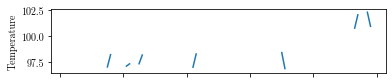

In [ ]:

ax1 = plt.subplot(311)
ax1.set_ylabel('Temperature')
plt.plot(range(record_len),df.Temp)
plt.tick_params('x', labelbottom=False)

ax2 = plt.subplot(312)
ax2.set_ylabel('Fever')
plt.plot(range(record_len),df.fever)
plt.tick_params('x', labelbottom=False)
plt.ylim([-1.5,1.5])

ax3 = plt.subplot(313)
ax3.set_ylabel('Hypothermia')
ax3.set_xlabel('Time')
plt.plot(range(record_len),df.hypothermia)
plt.ylim([-1.5,1.5])
plt.tick_params('x', labelsize=10)



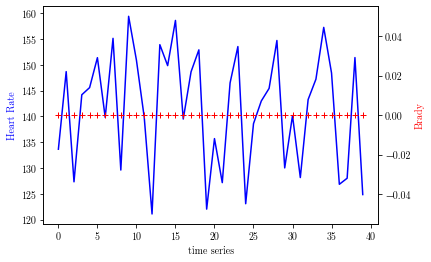

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.hr, 'b-')
ax2.plot(range(record_len),df.brady,'r+')

ax1.set_xlabel('time series')
ax1.set_ylabel('Heart Rate', color='b')
ax2.set_ylabel('Brady', color='r')

plt.show()

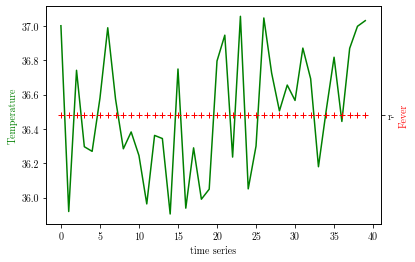

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.temp, 'g-')
ax2.plot(range(record_len),df.fever,'r+','r-')

ax1.set_xlabel('time series')
ax1.set_ylabel('Temperature', color='g')
ax2.set_ylabel('Fever', color='r')

plt.show()

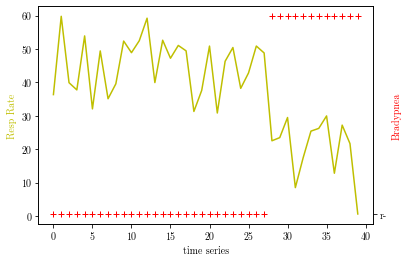

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.resp, 'y-')
ax2.plot(range(record_len),df.bradypnea,'r+','r-')

ax1.set_xlabel('time series')
ax1.set_ylabel('Resp Rate', color='y')
ax2.set_ylabel('Bradypnea', color='r')

plt.show()

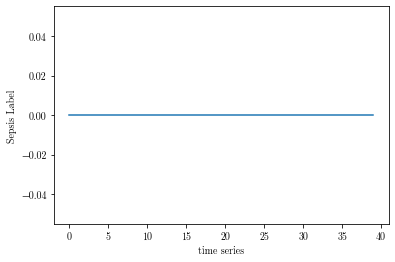

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df.sepsis)
ax1.set_xlabel('time series')
ax1.set_ylabel('Sepsis Label')

plt.show()

## Overall Analysis

First tun "./preprocess_artificial_neonatal_data.ipynb" to deal with nan values

Then run "./analyze_artificial_neonateal_data.ipynb"